In [60]:
import pandas as pd
import seaborn as sns

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Q2
Please follow the instructions below and inspect the outputs before you proceed. You can always check this original final to compare your results in your own copy.

In [62]:
#You have to make sure that you were able to write the file to a csv while your were working in R
house=pd.read_csv('/content/drive/MyDrive/DATA/house_prices.csv')
house.head()

,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
0,1,1976-01-01,Alabama,6.7,37.138285,0.040405
1,2,1976-02-01,Alabama,6.7,37.756437,0.051806
2,3,1976-03-01,Alabama,6.6,38.276319,0.059302
3,4,1976-04-01,Alabama,6.5,38.596135,0.059585
4,5,1976-05-01,Alabama,6.4,38.740517,0.055723


a) For the states below, please select the rows from the house dataframe, and consider converting the date column to date data type as it may be coming in string format. Then use the head function to preview your new dataframe.

In [63]:
states = ['Michigan', 'California', 'Texas', 'Indiana']

#filter dataframe for specific states and store in
#their own dataframes
mDF = house[house['state'].str.contains('Michigan')]
cDF = house[house['state'].str.contains('California')]
tDF = house[house['state'].str.contains('Texas')]
iDF = house[house['state'].str.contains('Indiana')]

#combine individual state dataframes
comboDF = [mDF, cDF, tDF, iDF]
finalDF = pd.concat(comboDF)

#create new dataframe with finalDF
df = finalDF

#convert date column of string data 
#type to date datatype
df["date"] = pd.to_datetime(df["date"])

#check df
df.head()

,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
11088,11089,1976-01-01,Michigan,9.9,25.211087,0.029244
11089,11090,1976-02-01,Michigan,9.9,25.266469,0.016700
11090,11091,1976-03-01,Michigan,9.9,25.400494,0.010444
11091,11092,1976-04-01,Michigan,9.8,25.575379,0.010598
11092,11093,1976-05-01,Michigan,9.6,25.686491,0.013325


b) Use the FacetGrid from seaborn to create line plots to represent house_price_index for each state. Please make the line color red, set ticks on x axis for years ['1980', '2000', '2020'], which you may have to convert date type again, put those years as labels, and set the titles for each small plot to their state names. In addition, set the y label to 'house price index' and remove the x label since it's obvious that these are years.

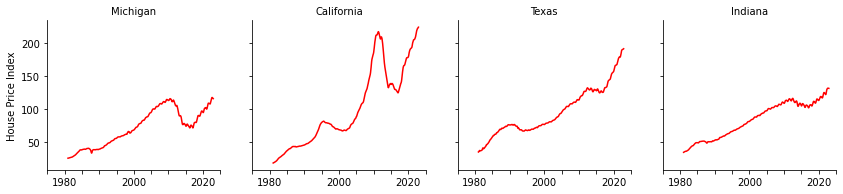

In [64]:
#create FacetGrid charts and set line color
g = sns.FacetGrid(df, col="state", hue="state", palette=['#FF0000','#FF0000','#FF0000','#FF0000'])
g.map(sns.lineplot, "date","house_price_index")

#format xticks
g.set_xticklabels(['','1980','','','','2000','','','','2020'])

# Adjust title and axis labels directly
g.set_titles("{col_name}")
g.set_axis_labels(x_var="", y_var="House Price Index")

c) Draw a lineplot for 'house price perc', but color them based on the 'state' name which will have four lines in a single plot. Set a legend which will be at the bottom of your graph and have them horizantally positioned next to eachother. Again, set the y label to house_price_perc and remove the x label since it's obvious. (Note that my y label is still showing index. Please ignore that.)

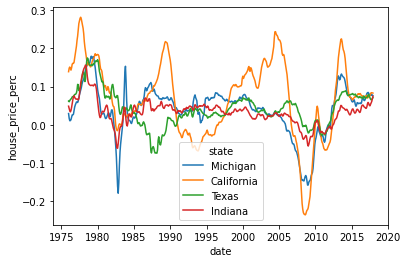

In [65]:
#create seaborn lineplot
p1 = sns.lineplot(data=df, x='date', y='house_price_perc', hue='state')

#center legend
sns.move_legend(p1, "lower center")     #could not figure out how to make the legend horizonal

##Q4
Please work on your 2nd question below. Please feel free to add new code cells.

In [66]:
#Your code goes here.
world_cup = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
world_cup.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [67]:
#(a)

#create dataframes for home and away teams using groupby
homeTeamDF = world_cup.groupby("Home Team Initials")
awayTeamDF = world_cup.groupby("Away Team Initials")

#use count on new dataframes
htCountDF = homeTeamDF.count()
atCountDF = awayTeamDF.count()

#create new dfs to hold the number of games played for each team
htDF = htCountDF.filter(['Home Team Initials','MatchID'], axis=1)
atDF = atCountDF.filter(['Away Team Initials', 'MatchId'], axis=1)

#check new df
htDF.head()

,MatchID
Home Team Initials,
ALG,6
ANG,1
ARG,54
AUS,6
AUT,13


In [68]:
atCountDF.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials
Away Team Initials,,,,,,,,,,,,,,,,,,,
ALG,8,8,8,8,8,8,8,8,8,8,6,8,8,8,8,8,8,8,8
ANG,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ARG,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
AUS,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
AUT,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [69]:
#(b)

#sum goals for home and away teams
homeTeamDF = world_cup.groupby("Home Team Initials")
htGoalsDF = homeTeamDF.sum('Home Team Goals')

awayTeamDF = world_cup.groupby("Away Team Initials")
atGoalsDF = awayTeamDF.sum('Away Team Goals')


#filter into new dataframes
htGoalSumDF = htGoalsDF.filter(['Home Team Initials', 'Home Team Goals'], axis=1)
atGoalSumDF = atGoalsDF.filter(['Away Team Initials', 'Away Team Goals'], axis=1)

In [ ]:
#(c)
team_pairs = world_cup.groupby(['Home Team Initials', 'Away Team Initials']).count().reset_index()

#set MatchID values = to htDF['MatchID']
htGoalsDF['MatchID'] = htDF['MatchID']

#delete extra coumns
del htGoalsDF['Year']
del htGoalsDF['Attendance']
del htGoalsDF['Half-time Home Goals']
del htGoalsDF['Half-time Away Goals']
del htGoalsDF['RoundID']

#add column for Away Team Initials and
#make it empty since I get a key error
#everytime I attempt to copy the actual
#initials in from a differnt dataframe
htGoalsDF['Away Team Initials'] = ""

#set team_pairs equal to htGoalsDF
team_pairs = htGoalsDF

Make sure that you only write four columns ('Home Team Initials', 'Away Team Initials', 'weight', 'HomeGoalTotal') from the data frame, team_pairs, to a csv file

In [96]:
team_pairs.to_csv('team_pairs.csv')